# Summary of experiments
* With LoRA only, training loss doesn't decrease enough - so what I'm showcasing in the original experiments is with the lm-head unfrozen, validation loss doesn't improve much with regularization

In [3]:
import re, matplotlib.pyplot as plt, os

In [4]:
# Regular expression to capture key-value pairs
pattern = re.compile(r"'(\w+)': ([\d.e+-]+)")

In [11]:
def parse_txt_log(fnames, pattern, log_folder="logs", plot=True):
    if plot:
        figsize = (15,10)
        fig_tloss = plt.figure(figsize=figsize)
        fig_vloss = plt.figure(figsize=figsize)
        fig_grad_norm = plt.figure(figsize=figsize)
        fig_lr = plt.figure(figsize=figsize)

    tlossmax = -1
    vlossmax = -1
    all_results = {fname: {} for fname in fnames}
    for fname in fnames:
        losses = []
        grad_norms = []
        learning_rates = []
        epochs = []

        eval_losses = []
        eval_epochs = []
        
        # Read the file and extract values
        # with open('./logs/' + fname + ".txt", 'r') as file:
        with open(os.path.join(log_folder, fname + ".txt"), 'r') as file:
            lines = file.readlines()
        
            for line in lines:
                matches = pattern.findall(line)  # Find all key-value pairs in the line
                data = {key: float(value) for key, value in matches}  # Convert to dictionary
        
                # Append the values to the respective lists
                if 'loss' in data:
                    losses.append(data['loss'])
                    
                    if 'grad_norm' in data:
                        grad_norms.append(data['grad_norm'])
                    else:
                        grad_norms.append(0.0)
        
                    if 'learning_rate' in data:
                        learning_rates.append(data['learning_rate'])
                    else:
                        learning_rates.append(0.0)
                    
                    epochs.append(data['epoch'])
                    
                elif 'eval_loss' in data:
                    eval_losses.append(data['eval_loss'])
                    eval_epochs.append(data['epoch'])

            tlossmax = max(tlossmax, max(losses))
            vlossmax = max(vlossmax, max(eval_losses))

        all_results[fname]['tloss'] = losses
        all_results[fname]['grad_norm'] = grad_norms
        all_results[fname]['lr'] = learning_rates
        all_results[fname]['t_epochs'] = epochs
        all_results[fname]['vloss'] = eval_losses
        all_results[fname]['v_epochs'] = eval_epochs

        if plot:
            plt.figure(fig_tloss.number)
            plt.plot(epochs, losses, label=fname)

            plt.figure(fig_vloss.number)
            plt.plot(eval_epochs, eval_losses, label=fname)
    
            plt.figure(fig_grad_norm.number)
            plt.plot(epochs, grad_norms, label=fname)
    
            plt.figure(fig_lr.number)
            plt.plot(epochs, learning_rates, label=fname)

    if plot:
        plt.figure(fig_tloss.number)
        plt.title('Training Loss')
        plt.ylim([0, tlossmax])
        plt.legend()
        plt.grid()

        plt.figure(fig_vloss.number)
        plt.title('Eval Loss')
        plt.ylim([0, vlossmax])
        plt.legend()
        plt.grid()

        plt.figure(fig_grad_norm.number)
        plt.title('Gradient Norm')
        plt.ylim([0, 5])
        plt.legend()
        plt.grid()

        plt.figure(fig_lr.number)
        plt.title('Learning Rate')
        plt.legend()
        plt.grid()

    return all_results

# LoRA experiments
Note that 512*512 is 28M params and unfreezing lm_head is 38M params

In [ ]:
log_folder = "logs"

fnames = ["bart-base_lora-8-32-0_ebs-8_lr-0.0004-step-1-0.998",
          "bart-base_lora-8-32-0_ebs-8_lr-0.0008-step-1-0.998",
          "bart-base_lora-8-32-0_ebs-8_lr-0.0016-step-1-0.998",
          "bart-base_lora-8-128-0_ebs-8_lr-0.0016-step-1-0.998",
          "bart-base_lora-128-128-0_ebs-8_lr-0.0016-step-1-0.998",
          "bart-base_lora-512-128-0_ebs-8_lr-0.0016-step-1-0.998",
          # "bart-base_lora-512-128-0_ebs-8_lr-0.0008-step-1-0.998",
          # "bart-base_lora-512-128-0_ebs-8_lr-0.0032-step-1-0.998",
          "bart-base_lora-512-512-0_ebs-8_lr-0.0008-step-1-0.999",
          "bart-base_lora-512-512-0_ebs-8_lr-0.0008-step-1-0.999_pt2",
         ]

# 512 x 512
# fnames = ["bart-base_lora-512-128-0_ebs-8_lr-0.0016-step-1-0.998",
#           "bart-base_lora-512-512-0_ebs-8_lr-0.0016-step-1-0.998",
#           "bart-base_lora-512-512-0_ebs-8_lr-0.0008-step-1-0.998",
#           "bart-base_lora-512-512-0_ebs-8_lr-0.0004-step-1-0.998",
#           "bart-base_lora-512-512-0_ebs-8_lr-0.0008-step-1-0.997",
#           "bart-base_lora-512-512-0_ebs-8_lr-0.0008-step-1-0.999",
#           "bart-base_lora-512-512-0_ebs-8_lr-0.0008-step-1-0.999_pt2",
#           "bart-base_lora-512-512-0_ebs-8_lr-0.0008-step-1-0.9992",
#           "bart-base_lora-512-512-0_ebs-8_lr-0.0008-step-1-0.9994",
#          ]

all_results = parse_txt_log(fnames, pattern, log_folder=log_folder)

# Unfreezing BART experiments
I think this plot is also the best overall picture

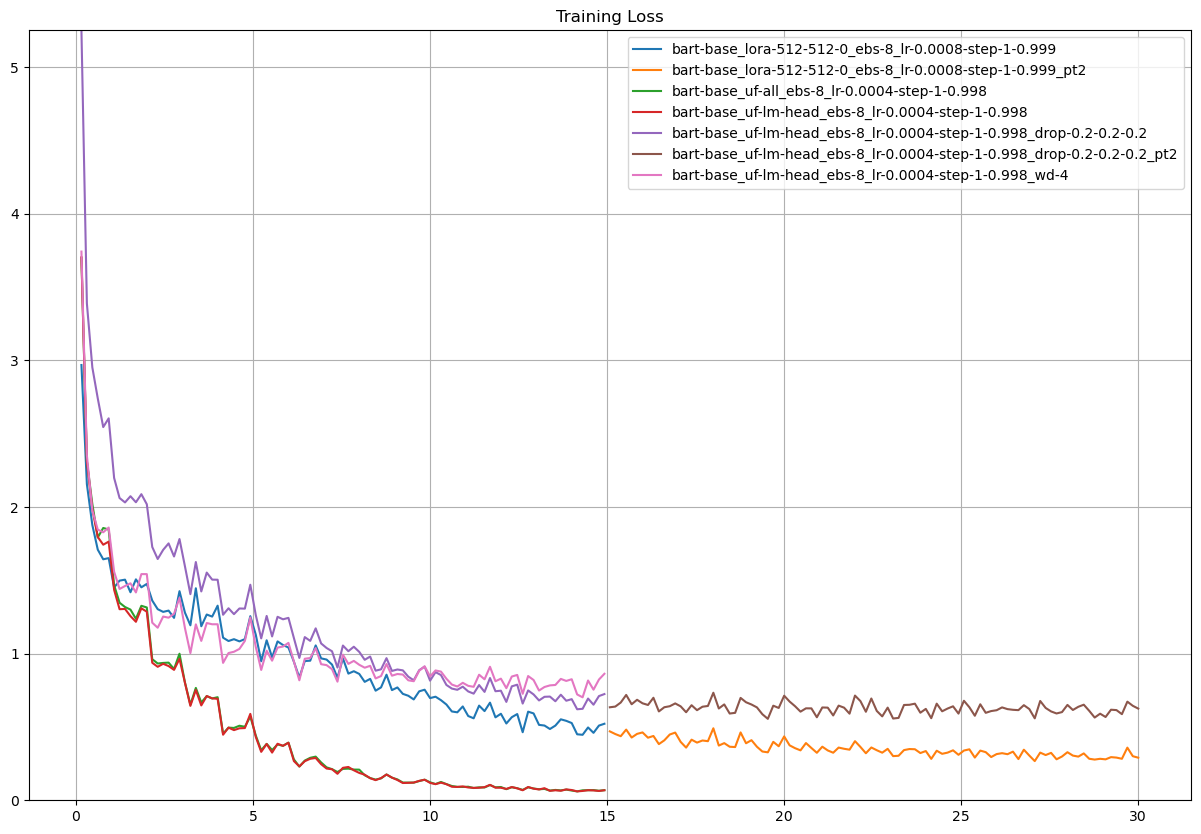

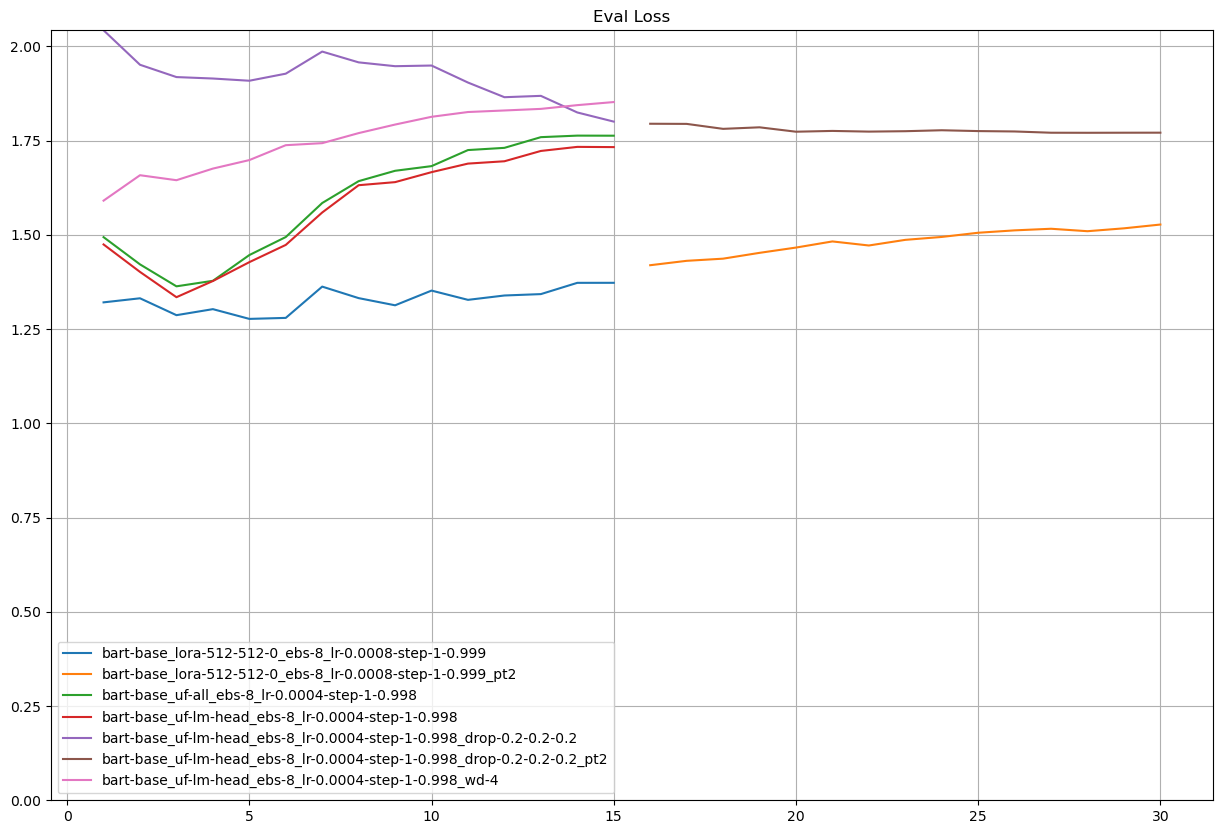

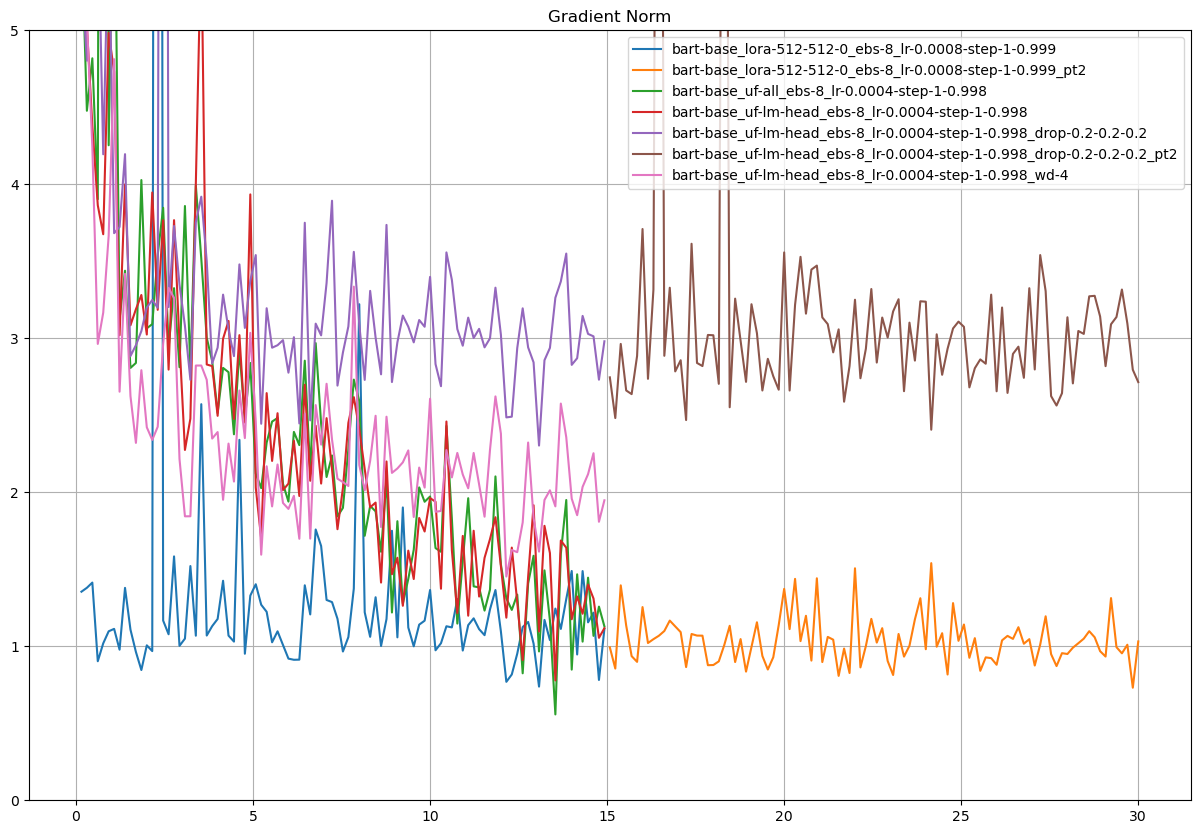

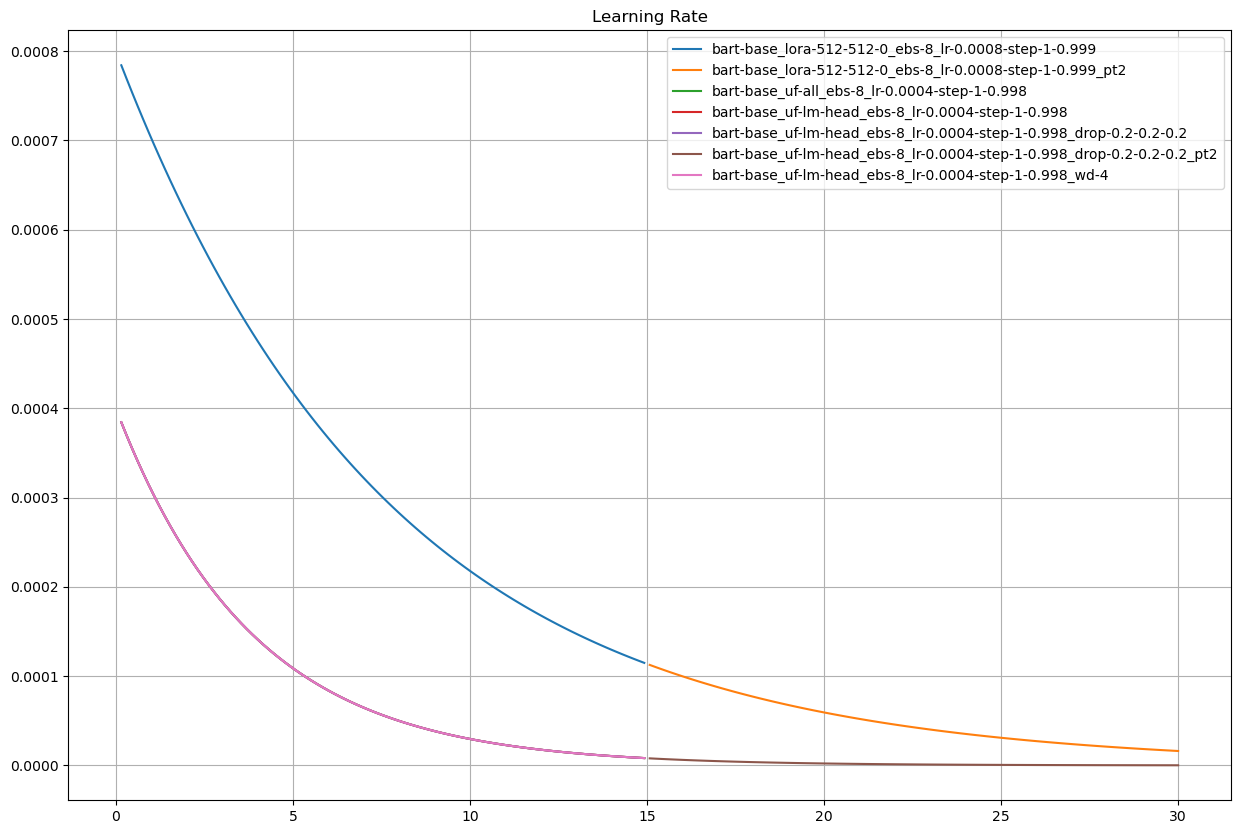

In [27]:
log_folder = "logs"

fnames = ["bart-base_lora-512-512-0_ebs-8_lr-0.0008-step-1-0.999",
          "bart-base_lora-512-512-0_ebs-8_lr-0.0008-step-1-0.999_pt2",
          "bart-base_uf-all_ebs-8_lr-0.0004-step-1-0.998",
          "bart-base_uf-lm-head_ebs-8_lr-0.0004-step-1-0.998",
          "bart-base_uf-lm-head_ebs-8_lr-0.0004-step-1-0.998_drop-0.2-0.2-0.2",
          "bart-base_uf-lm-head_ebs-8_lr-0.0004-step-1-0.998_drop-0.2-0.2-0.2_pt2",
          "bart-base_uf-lm-head_ebs-8_lr-0.0004-step-1-0.998_wd-4",
         ]

all_results = parse_txt_log(fnames, pattern, log_folder=log_folder)

# Original BART dropout experiments
For number of epochs = 30, I sometimes used early stopping

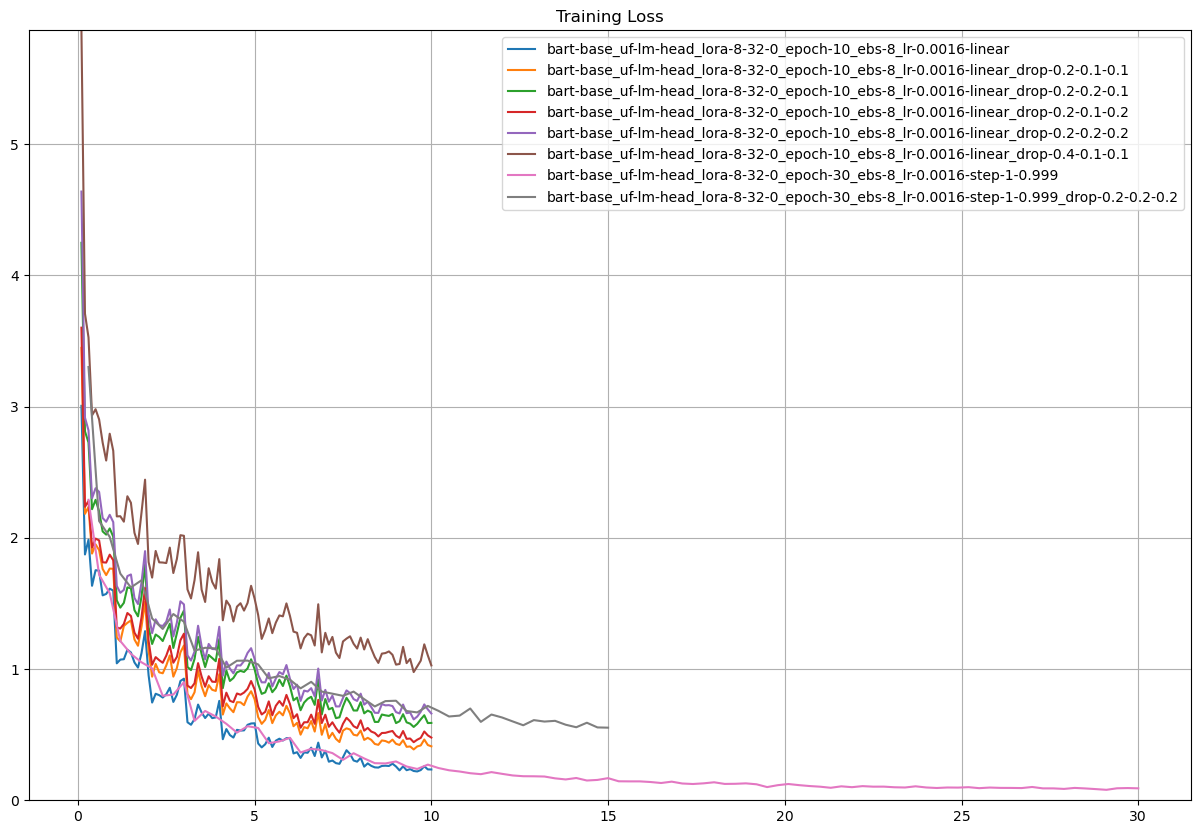

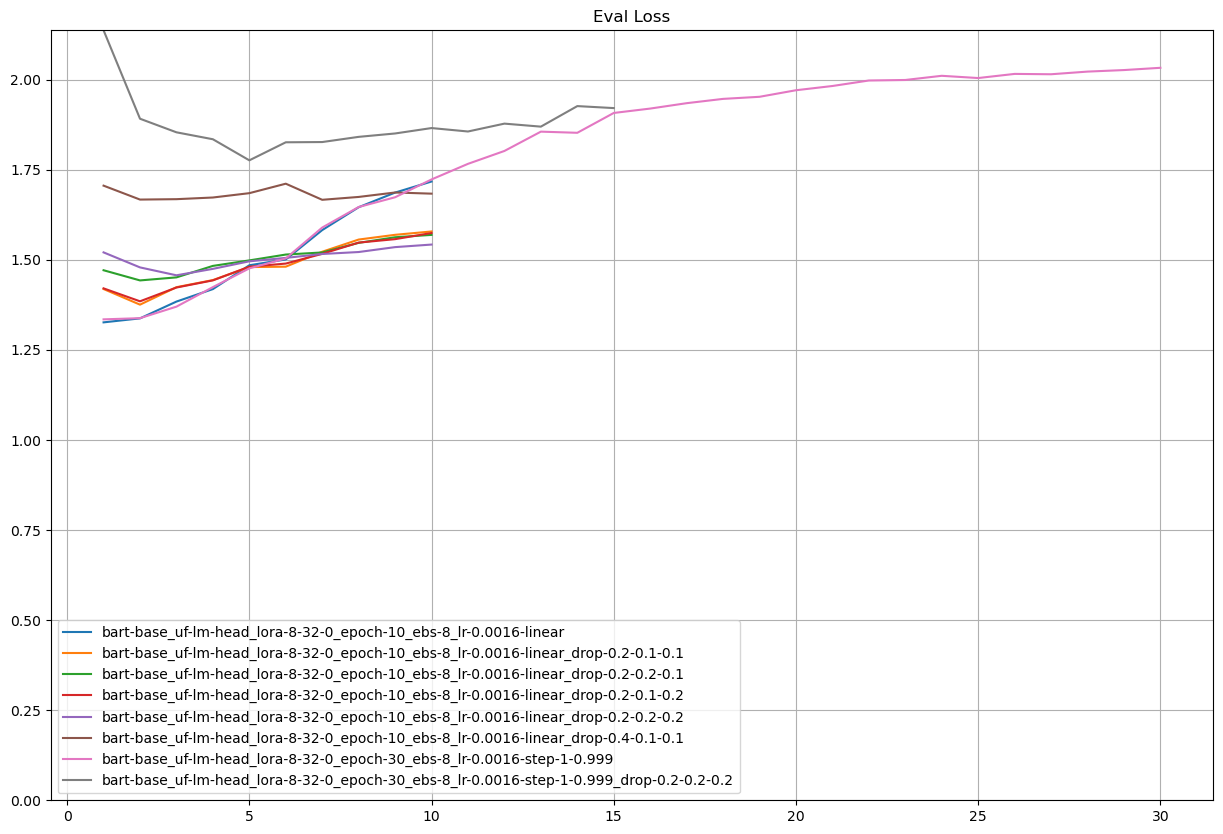

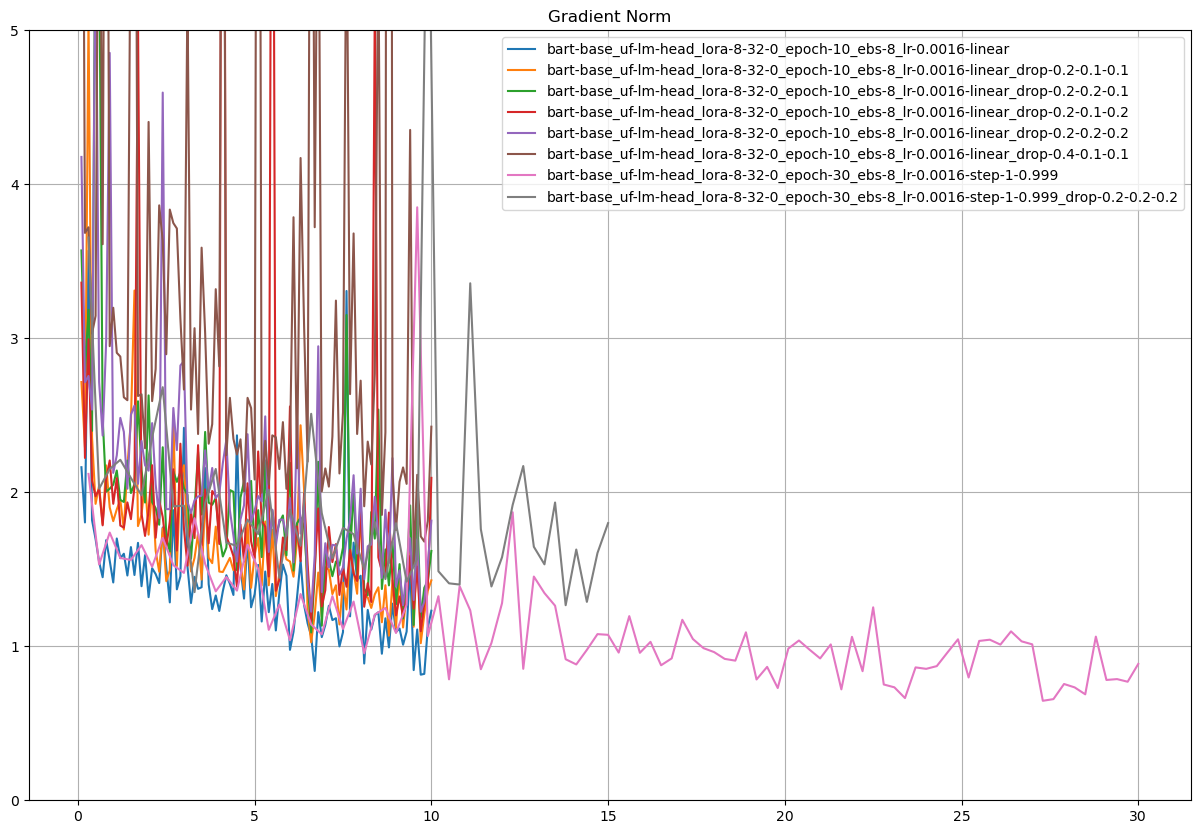

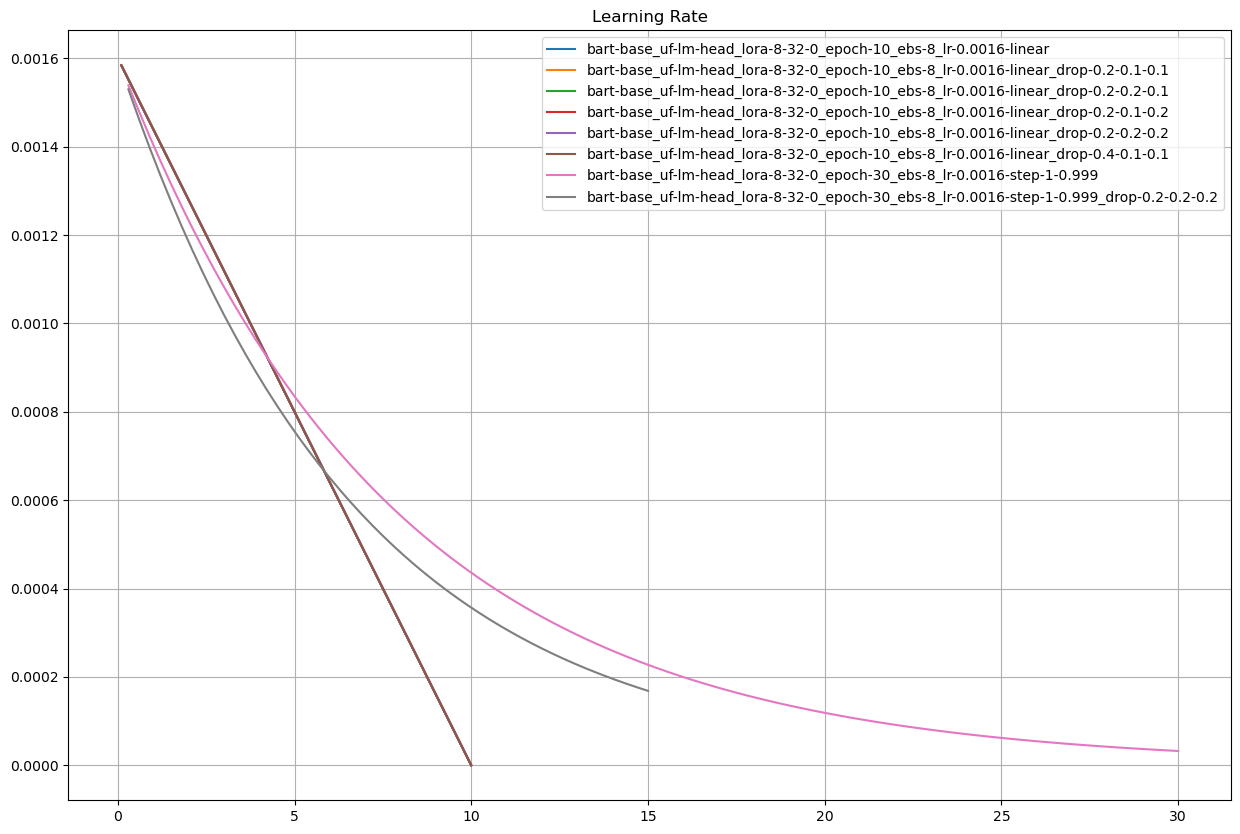

In [13]:
log_folder = "logs-1"

fnames = ["bart-base_uf-lm-head_lora-8-32-0_epoch-10_ebs-8_lr-0.0016-linear",
          "bart-base_uf-lm-head_lora-8-32-0_epoch-10_ebs-8_lr-0.0016-linear_drop-0.2-0.1-0.1",
          "bart-base_uf-lm-head_lora-8-32-0_epoch-10_ebs-8_lr-0.0016-linear_drop-0.2-0.2-0.1",
          "bart-base_uf-lm-head_lora-8-32-0_epoch-10_ebs-8_lr-0.0016-linear_drop-0.2-0.1-0.2",
          "bart-base_uf-lm-head_lora-8-32-0_epoch-10_ebs-8_lr-0.0016-linear_drop-0.2-0.2-0.2",
          "bart-base_uf-lm-head_lora-8-32-0_epoch-10_ebs-8_lr-0.0016-linear_drop-0.4-0.1-0.1",
          # "bart-base_uf-lm-head_lora-8-32-0_epoch-10_ebs-8_lr-0.0016-linear_drop-0.9-0.1-0.1",
          "bart-base_uf-lm-head_lora-8-32-0_epoch-30_ebs-8_lr-0.0016-step-1-0.999",
          "bart-base_uf-lm-head_lora-8-32-0_epoch-30_ebs-8_lr-0.0016-step-1-0.999_drop-0.2-0.2-0.2",
         ]

all_results = parse_txt_log(fnames, pattern, log_folder=log_folder)

# Original weight decay experiments
For number of epochs = 30, I sometimes used early stopping

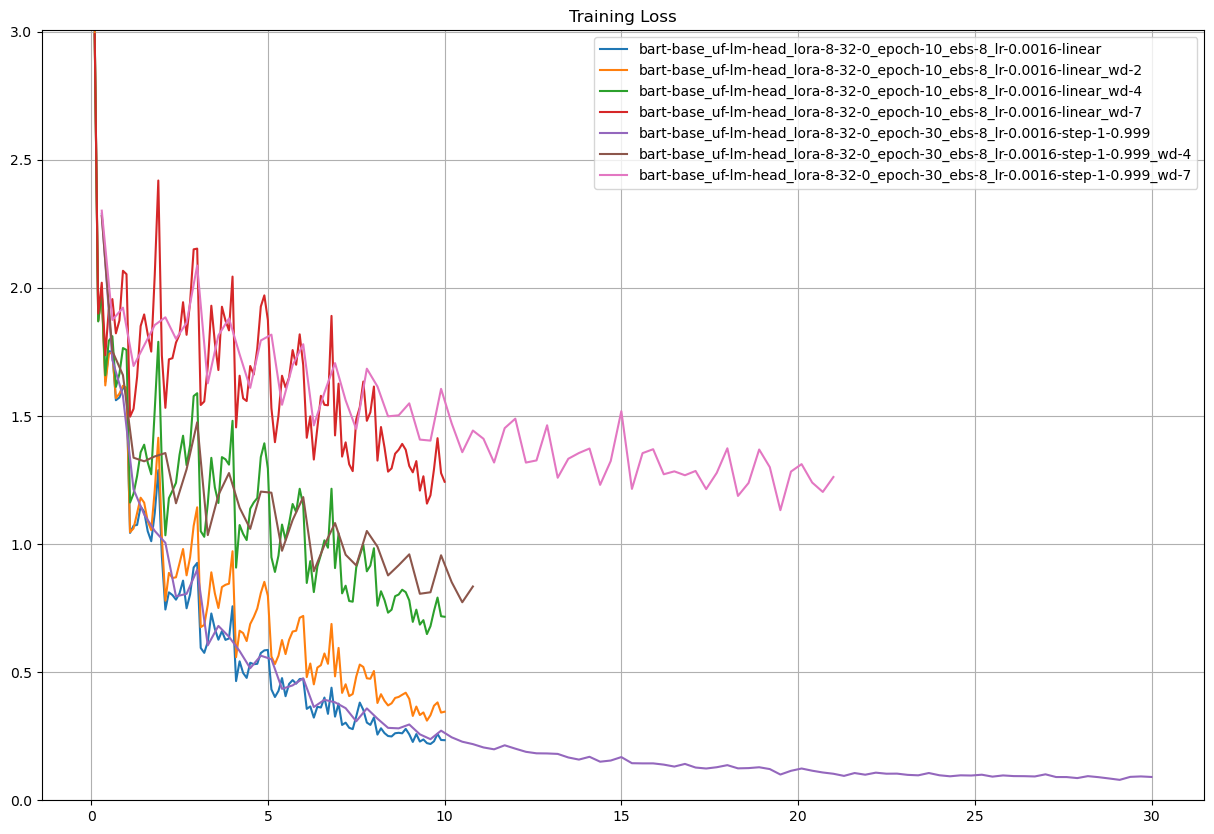

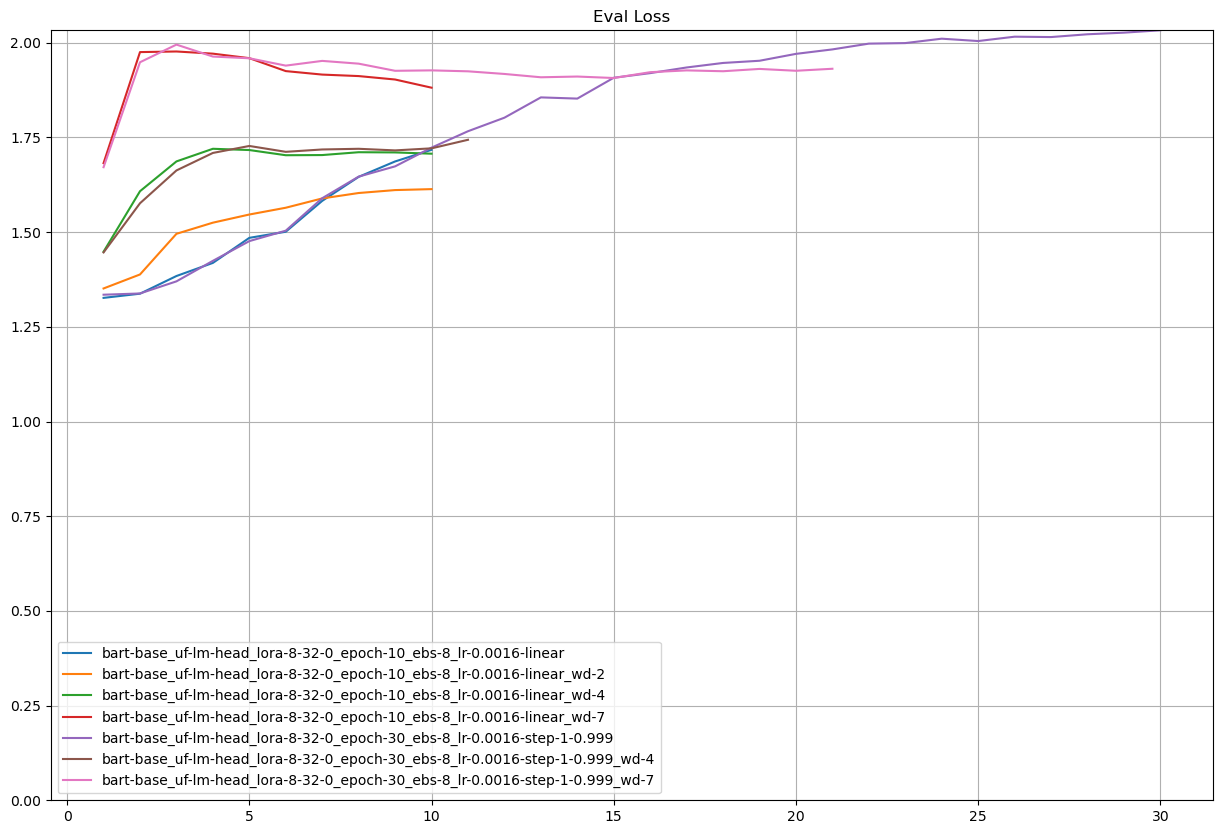

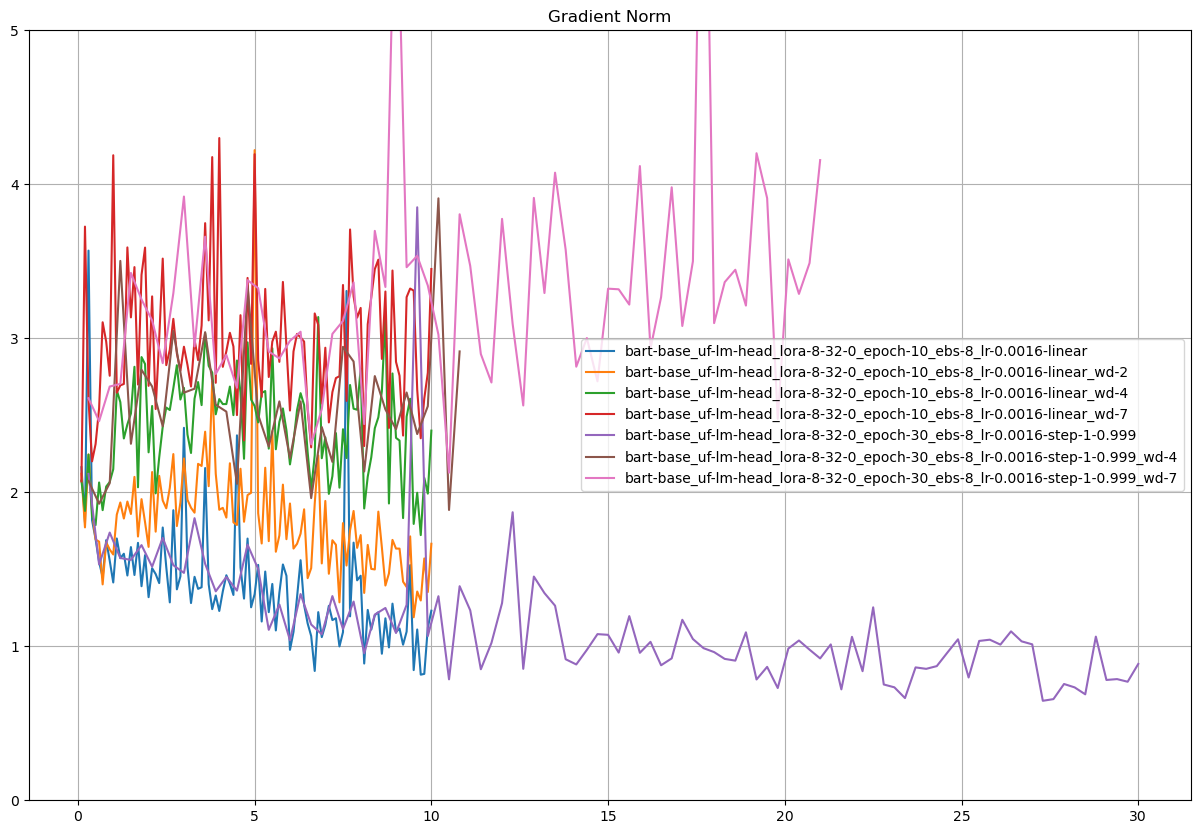

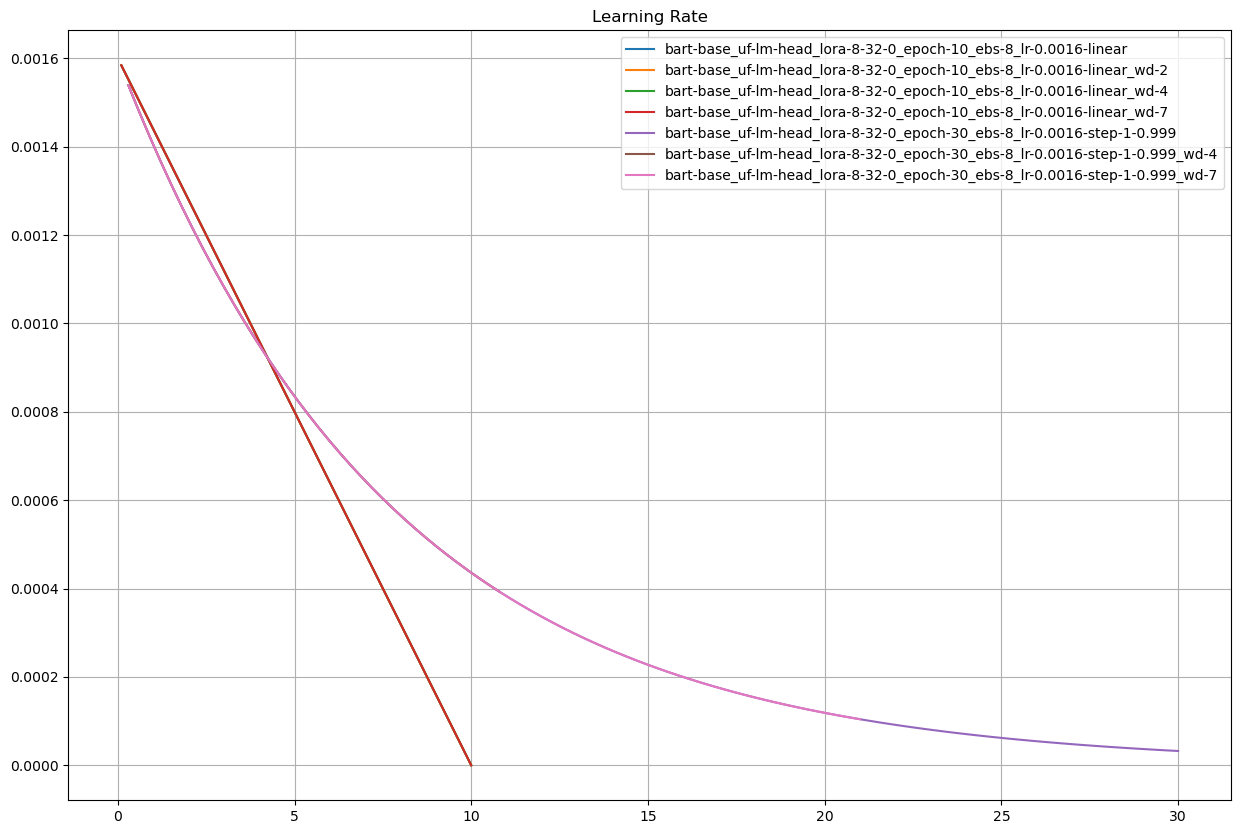

In [19]:
log_folder = "logs-1"

# fnames = ["bart-base_uf-lm-head_lora-8-32-0_epoch-10_ebs-8_lr-0.0016-linear_wd-0.0001",
          # "bart-base_uf-lm-head_lora-8-32-0_epoch-10_ebs-8_lr-0.0016-linear_wd-0.01",
fnames = ["bart-base_uf-lm-head_lora-8-32-0_epoch-10_ebs-8_lr-0.0016-linear",
          # "bart-base_uf-lm-head_lora-8-32-0_epoch-10_ebs-8_lr-0.0016-linear_wd-1",
          "bart-base_uf-lm-head_lora-8-32-0_epoch-10_ebs-8_lr-0.0016-linear_wd-2",
          "bart-base_uf-lm-head_lora-8-32-0_epoch-10_ebs-8_lr-0.0016-linear_wd-4",
          "bart-base_uf-lm-head_lora-8-32-0_epoch-10_ebs-8_lr-0.0016-linear_wd-7",
          "bart-base_uf-lm-head_lora-8-32-0_epoch-30_ebs-8_lr-0.0016-step-1-0.999",
          "bart-base_uf-lm-head_lora-8-32-0_epoch-30_ebs-8_lr-0.0016-step-1-0.999_wd-4",
          "bart-base_uf-lm-head_lora-8-32-0_epoch-30_ebs-8_lr-0.0016-step-1-0.999_wd-7",
         ]

all_results = parse_txt_log(fnames, pattern, log_folder=log_folder)

# Dataset experiments

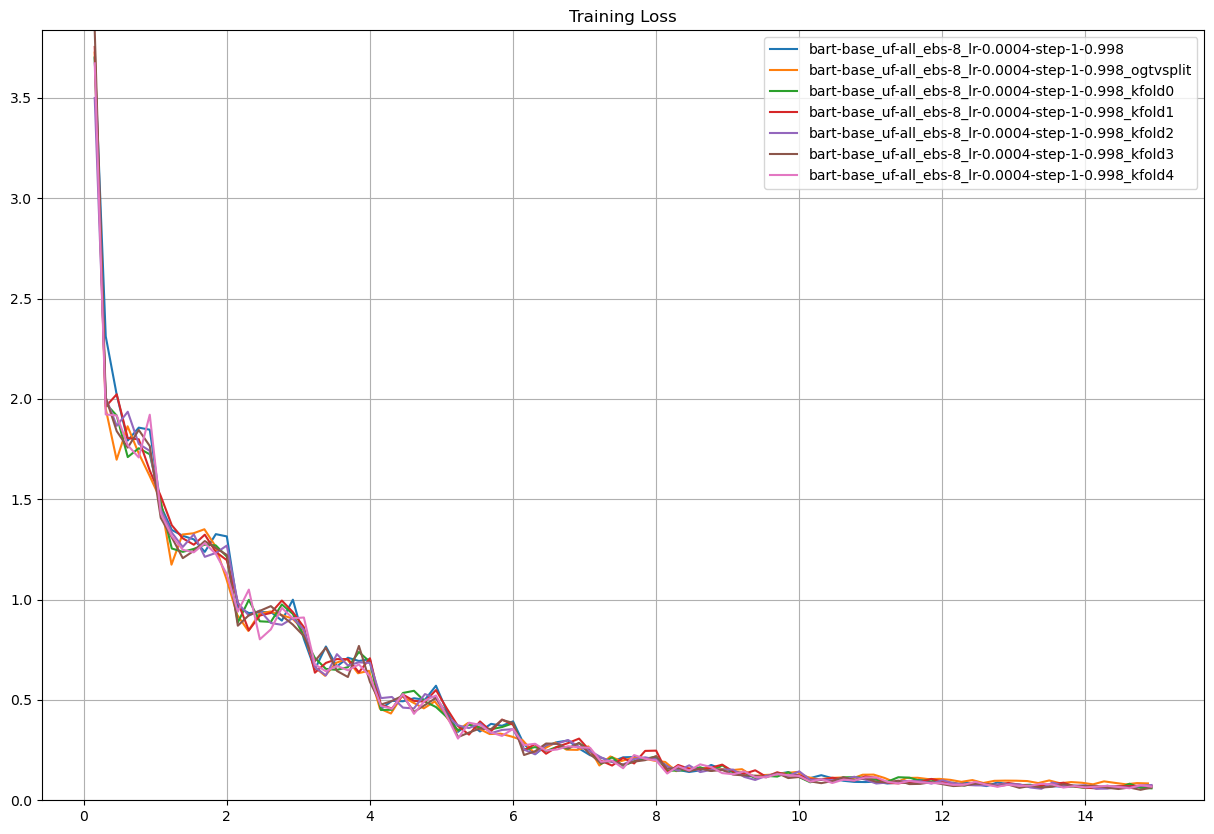

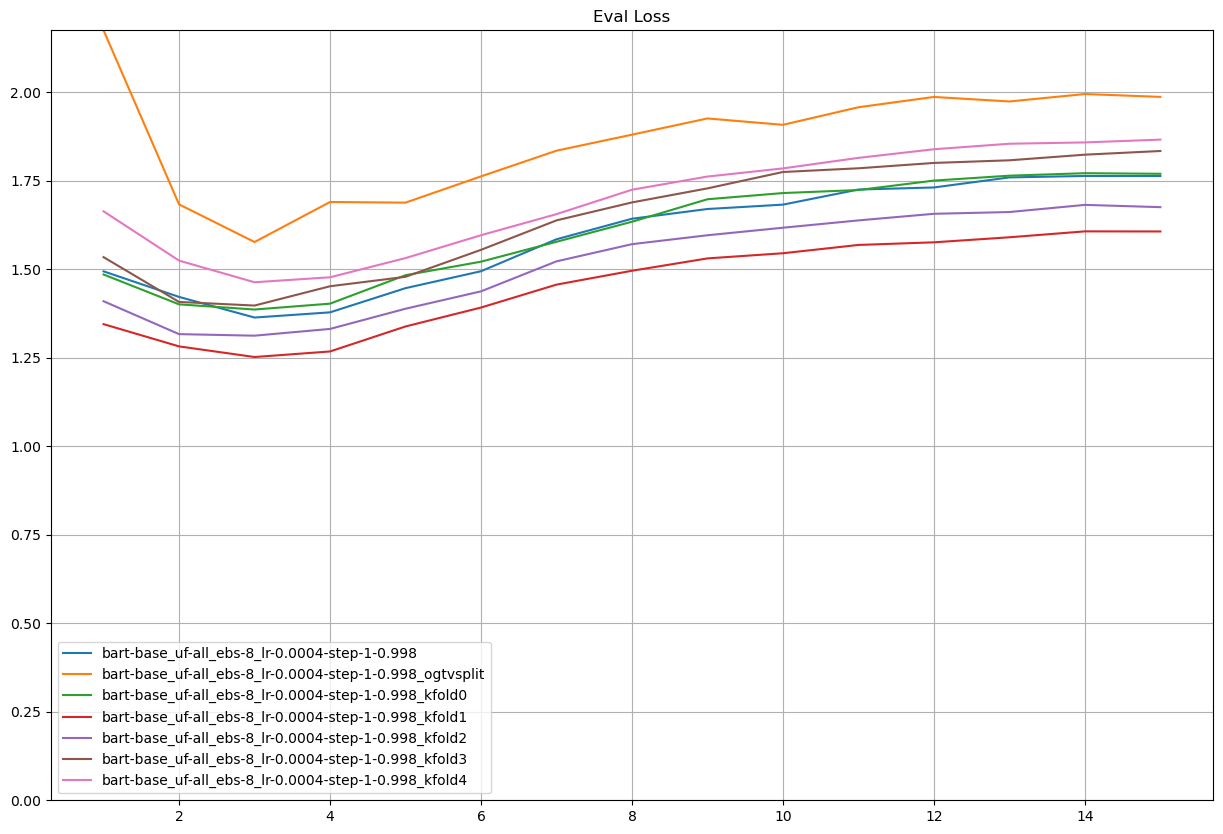

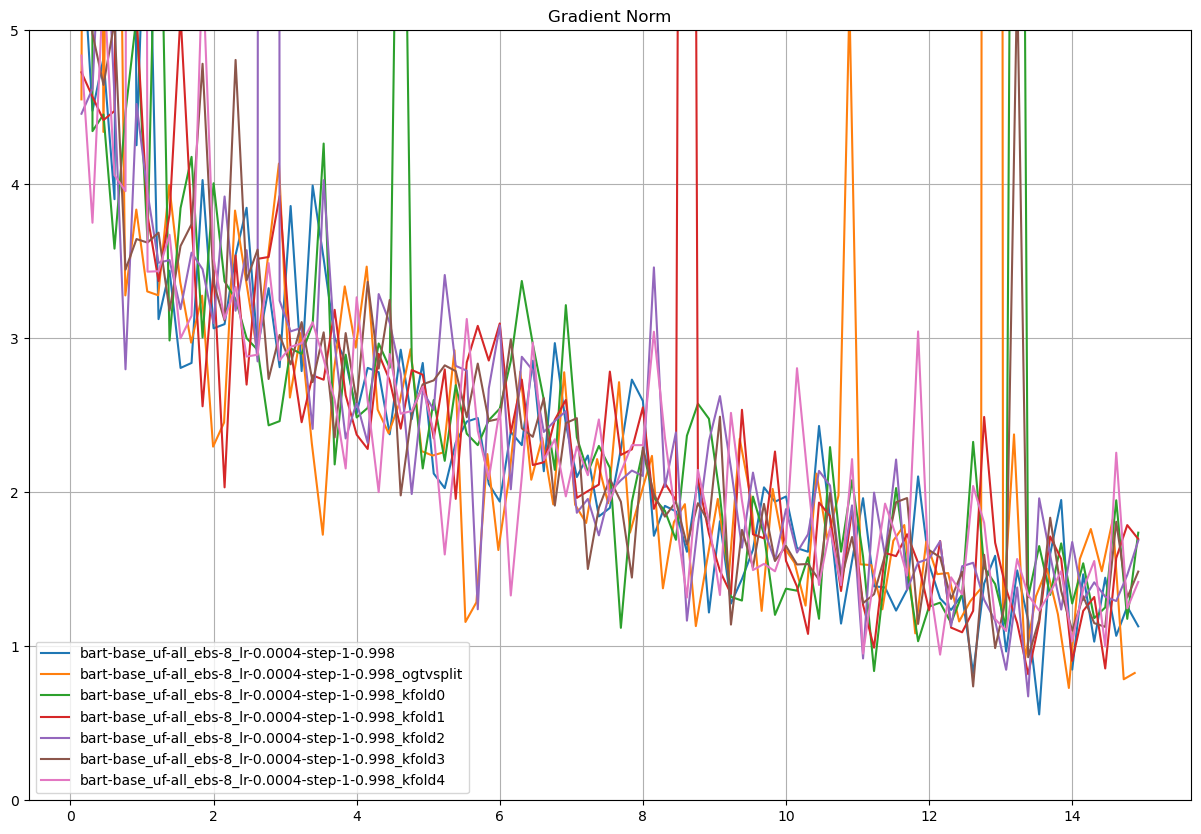

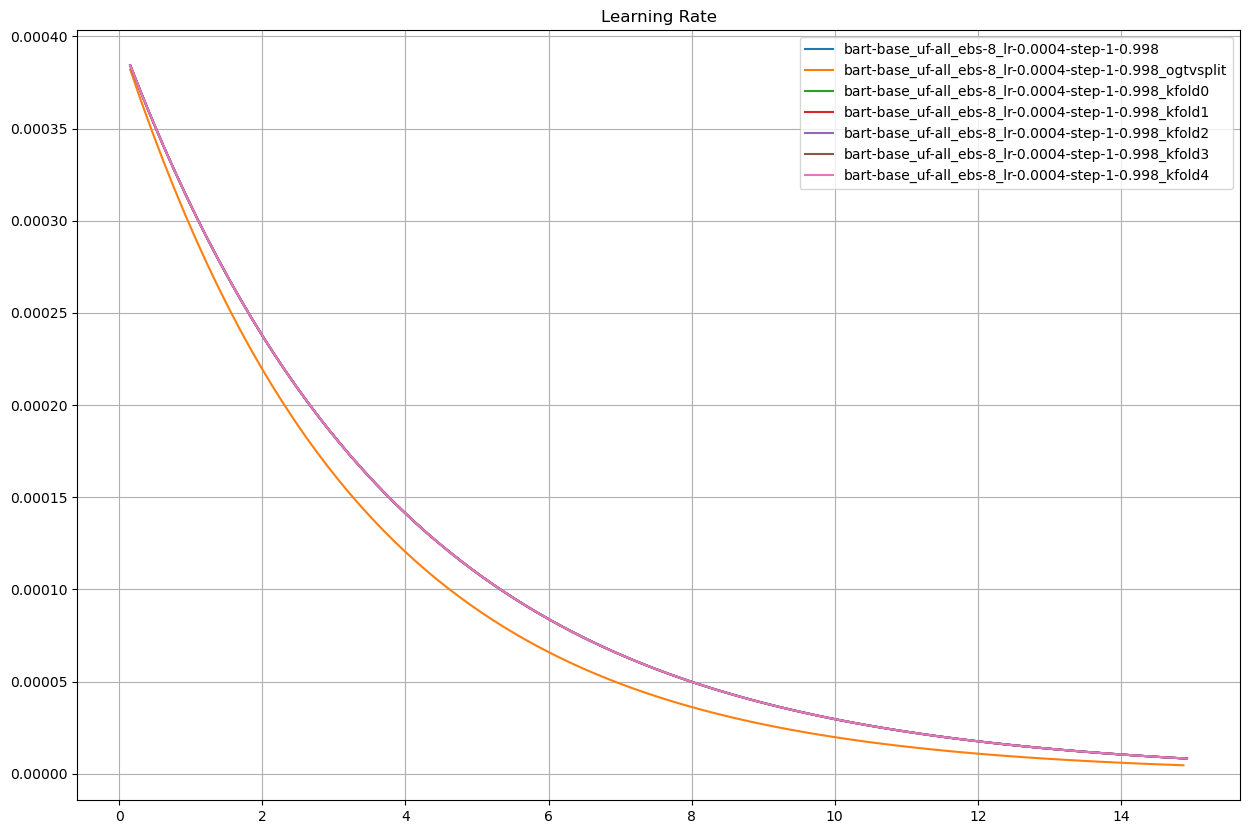

In [28]:
log_folder = "logs"

fnames = ["bart-base_uf-all_ebs-8_lr-0.0004-step-1-0.998",
          "bart-base_uf-all_ebs-8_lr-0.0004-step-1-0.998_ogtvsplit",
          "bart-base_uf-all_ebs-8_lr-0.0004-step-1-0.998_kfold0",
          "bart-base_uf-all_ebs-8_lr-0.0004-step-1-0.998_kfold1",
          "bart-base_uf-all_ebs-8_lr-0.0004-step-1-0.998_kfold2",
          "bart-base_uf-all_ebs-8_lr-0.0004-step-1-0.998_kfold3",
          "bart-base_uf-all_ebs-8_lr-0.0004-step-1-0.998_kfold4",
         ]      

all_results = parse_txt_log(fnames, pattern, log_folder=log_folder)